    1- test function
    2- MC tests

In [1]:
# ! delete the following
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1- Test functions

In [3]:
from mcrppy.integrand_test_functions import (support_integrands,
                                             f_1, f_2, f_3,
                                             exact_integral_f_1, exact_integral_f_2,
                                             exact_integral_f_3)


In [4]:
nb_function=5
fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]
exact_integrals = [exact_integral_f_1, exact_integral_f_2, exact_integral_f_3]
for d in range(2,8):
    exact_integrals = [exact_integral_f_1(d), exact_integral_f_2(d), exact_integral_f_3(d)]
    print("for d={}".format(d))
    i_f = [{name: integ} for name, integ in zip(fct_names, exact_integrals)]
    print("Exact integral functions=", i_f )

for d=2
Exact integral functions= [{'f_1': None}, {'f_2': 0.7853981633974483}, {'f_3': 0}]
for d=3
Exact integral functions= [{'f_1': None}, {'f_2': 0.5235987755982988}, {'f_3': 0}]
for d=4
Exact integral functions= [{'f_1': None}, {'f_2': 0.30842513753404244}, {'f_3': 0}]
for d=5
Exact integral functions= [{'f_1': None}, {'f_2': 0.16449340668482262}, {'f_3': 0}]
for d=6
Exact integral functions= [{'f_1': None}, {'f_2': 0.08074551218828077}, {'f_3': 0}]
for d=7
Exact integral functions= [{'f_1': None}, {'f_2': 0.03691223414321407}, {'f_3': 0}]


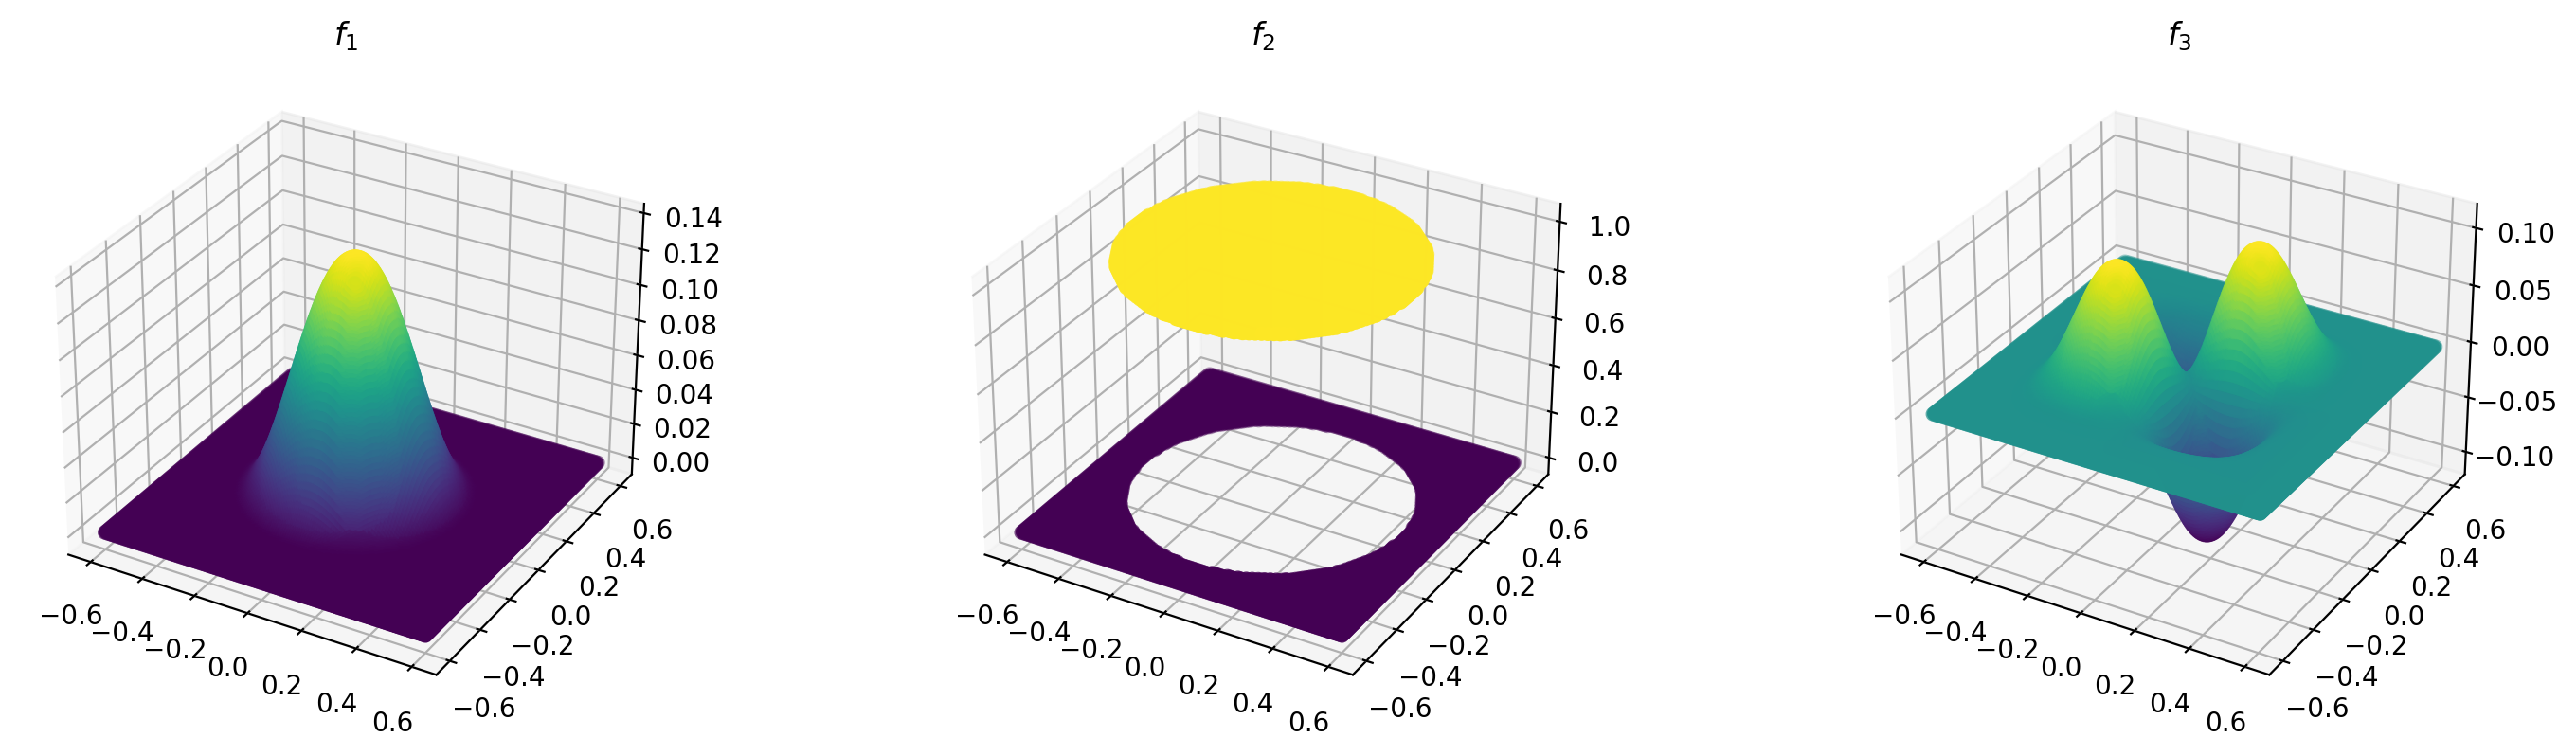

In [5]:
x = np.linspace(-3/5,3/5, 140)
X, Y = np.meshgrid(x, x)
points = np.array([X.ravel(), Y.ravel()]).T
z_f_1 = f_1(points)
z_f_2 = f_2(points)
z_f_3 = f_3(points)
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_1, c=z_f_1, rasterized=True)
ax.set_title(r"$f_1$")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_2, c=z_f_2, rasterized=True)
ax.set_title(r"$f_2$")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_3, c=z_f_3, rasterized=True)
ax.set_title(r"$f_3$")
plt.tight_layout()
#plt.savefig("linear_stat_used_for_var_comp.pdf")
plt.show()

# 2- MC tests 

In [6]:
from mcrppy.monte_carlo_methods import mc_results, dataframe_error_test, dataframe_mse_results, dataframe_residual_test
from mcrppy.plot_functions import plot_mc_results, qq_plot_residual

In [11]:
nb_samples=100
nb_cores = 3
nb_points_list=np.arange(50, 1025, 25).tolist()
fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]
estimators = ["MC", 
              "MCRB",
              "MCCV",
              "RQMC",
              "MCDPP"]
print("Number of tests: ", len(nb_points_list))
print("Number of points to be used:", nb_points_list)
print("Methods to be used:", estimators)

Number of tests:  39
Number of points to be used: [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
Methods to be used: ['MC', 'MCRB', 'MCCV', 'RQMC', 'MCDPP']


### For d=2

In [12]:
d=2
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d)]
support_window = support_integrands(d) 

In [13]:
if __name__ == "__main__":
    results_2d, nb_points_2d = mc_results(d, 
                                          nb_points_list=nb_points_list, 
                                          nb_samples=nb_samples,
                                          support_window=support_window,
                                          fct_list=fct_list,
                                          fct_names=fct_names,
                                          exact_integrals=exact_integrals,
                                          estimators=estimators, 
                                          nb_cores=nb_cores,
                                          file_name="mc_results_2d_final.pickle"
                                            )

d= 2 , nb samples= 100 , nb points= [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
------------------------------------------------
For MCRB
---------------
FOR f_1
std= [0.0023948870852764366]
MSE= NAN
FOR f_2
std= [0.043985628469797027]
MSE= [0.00201696]
FOR f_3
std= [0.0030114206920012986]
MSE= [9.49403936e-06]
For MC
---------------
FOR f_1
std= [0.0044633862313377464]
MSE= NAN
FOR f_2
std= [0.054737646209317786]
MSE= [0.00304033]
FOR f_3
std= [0.005611647808059768]
MSE= [3.15632647e-05]
For MCCV
---------------
Mean proposal theoretical: [0.01978414] Estiamted: 0.0206545795427687
FOR f_1
std= [0.003045012185408998]
MSE= NAN
Mean proposal theoretical: [0.77708432] Estiamted: 0.7919999999999998
FOR f_2
std= [0.032511365513552964]
MSE= [0.00105779]
Mean proposal theoretical: [-0.00056069] Estiamted: -0.0014551264917477265
FOR f_3
std= [0.

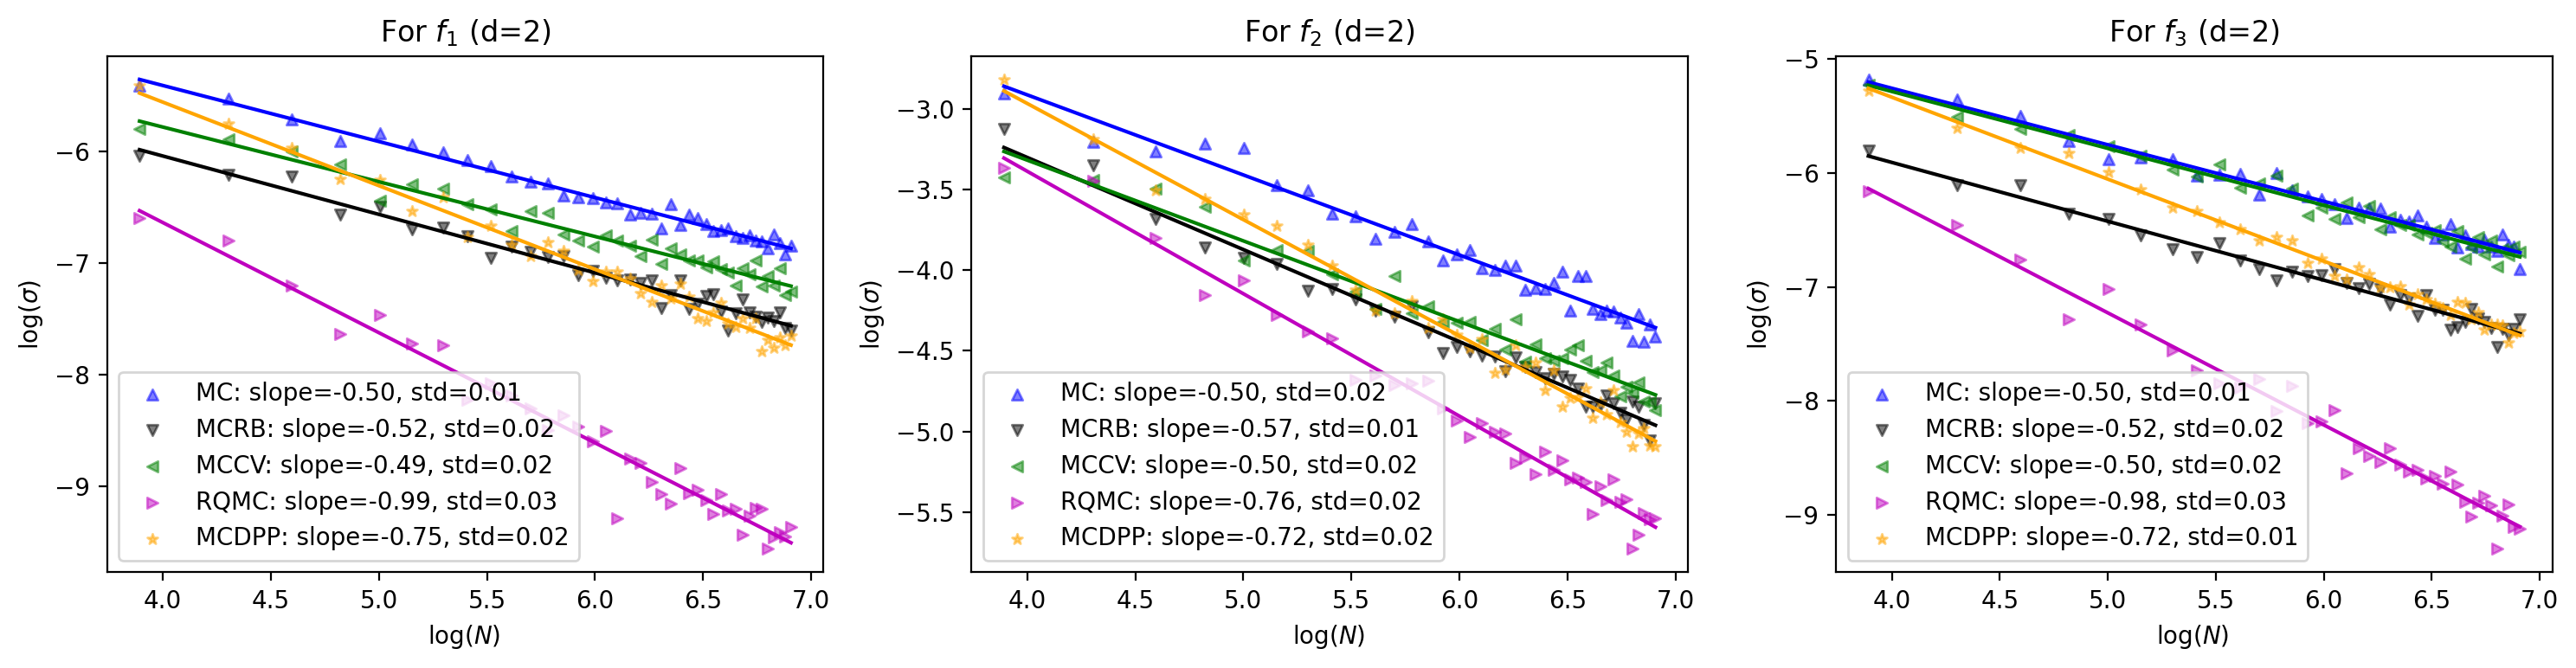

In [14]:
plot_mc_results(d, 
                results_2d, 
                nb_points_2d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_2_d.pdf"
               )

In [25]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=results_2d, 
                        nb_points_list=nb_points_2d, 
                        fct_names=fct_names, 
                        test_type="SW")

Normality test of residuals of the linear regression:


,f_1,f_2,f_3
MC,"(stat=0.854, p=0.133)","(stat=0.939, p=0.633)","(stat=0.830, p=0.0798)"
MCRB,"(stat=0.924, p=0.498)","(stat=0.936, p=0.603)","(stat=0.918, p=0.456)"
MCCV,"(stat=0.979, p=0.955)","(stat=0.952, p=0.752)","(stat=0.923, p=0.492)"
RQMC,"(stat=0.907, p=0.377)","(stat=0.993, p=0.997)","(stat=0.864, p=0.164)"
MCDPP,"(stat=0.847, p=0.114)","(stat=0.947, p=0.7)","(stat=0.940, p=0.639)"


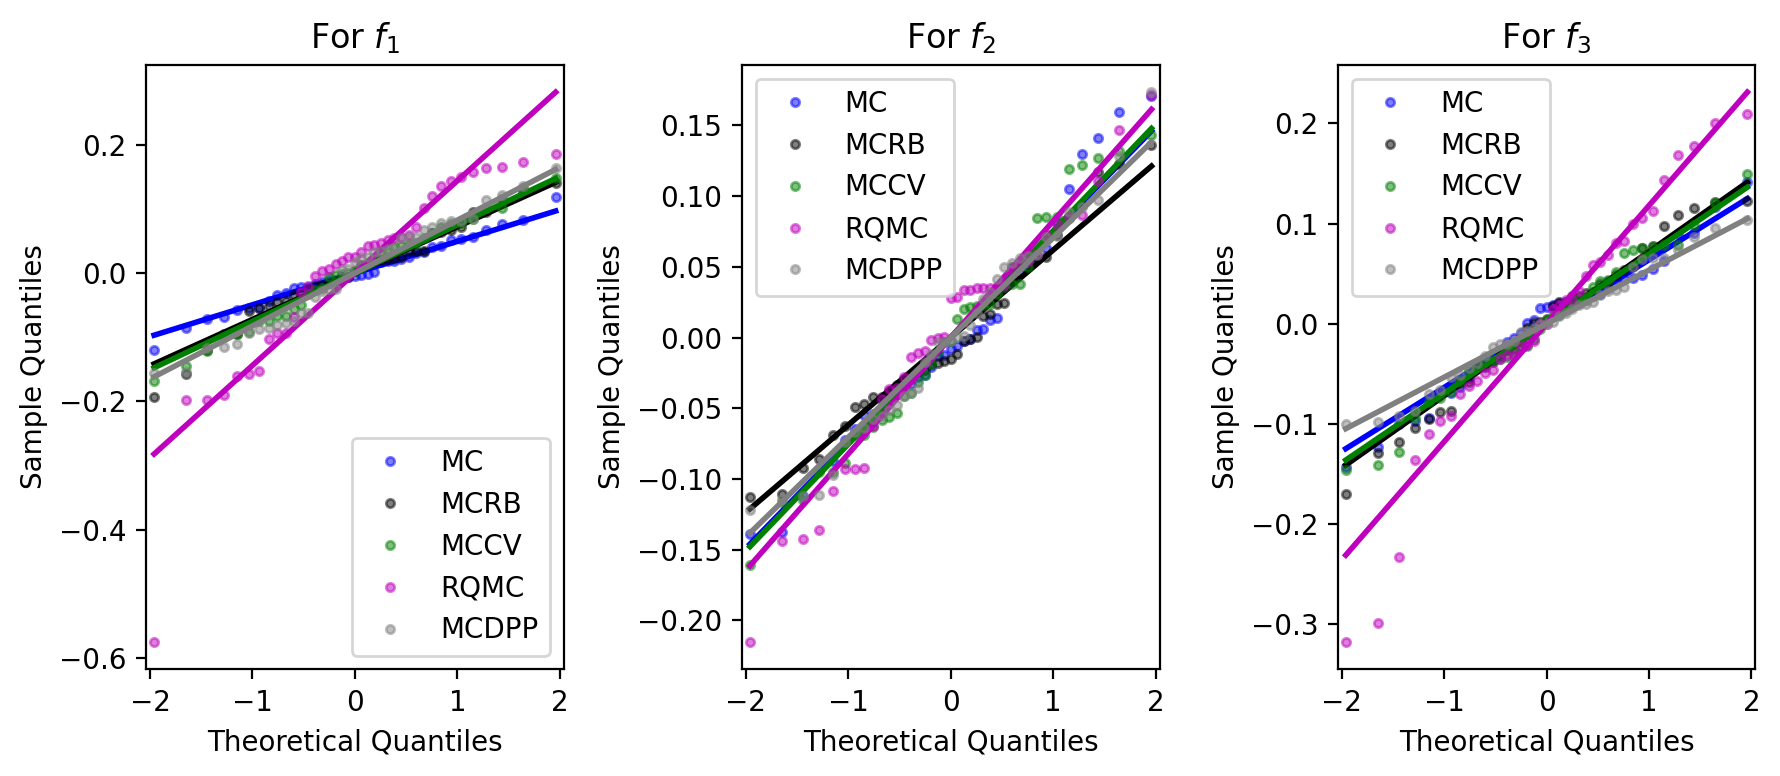

In [16]:
qq_plot_residual(mc_list=results_2d, 
                 nb_points_list=nb_points_2d, 
                 fct_names=fct_names,
                #save_fig="qq_plot_2d.pdf"
                )

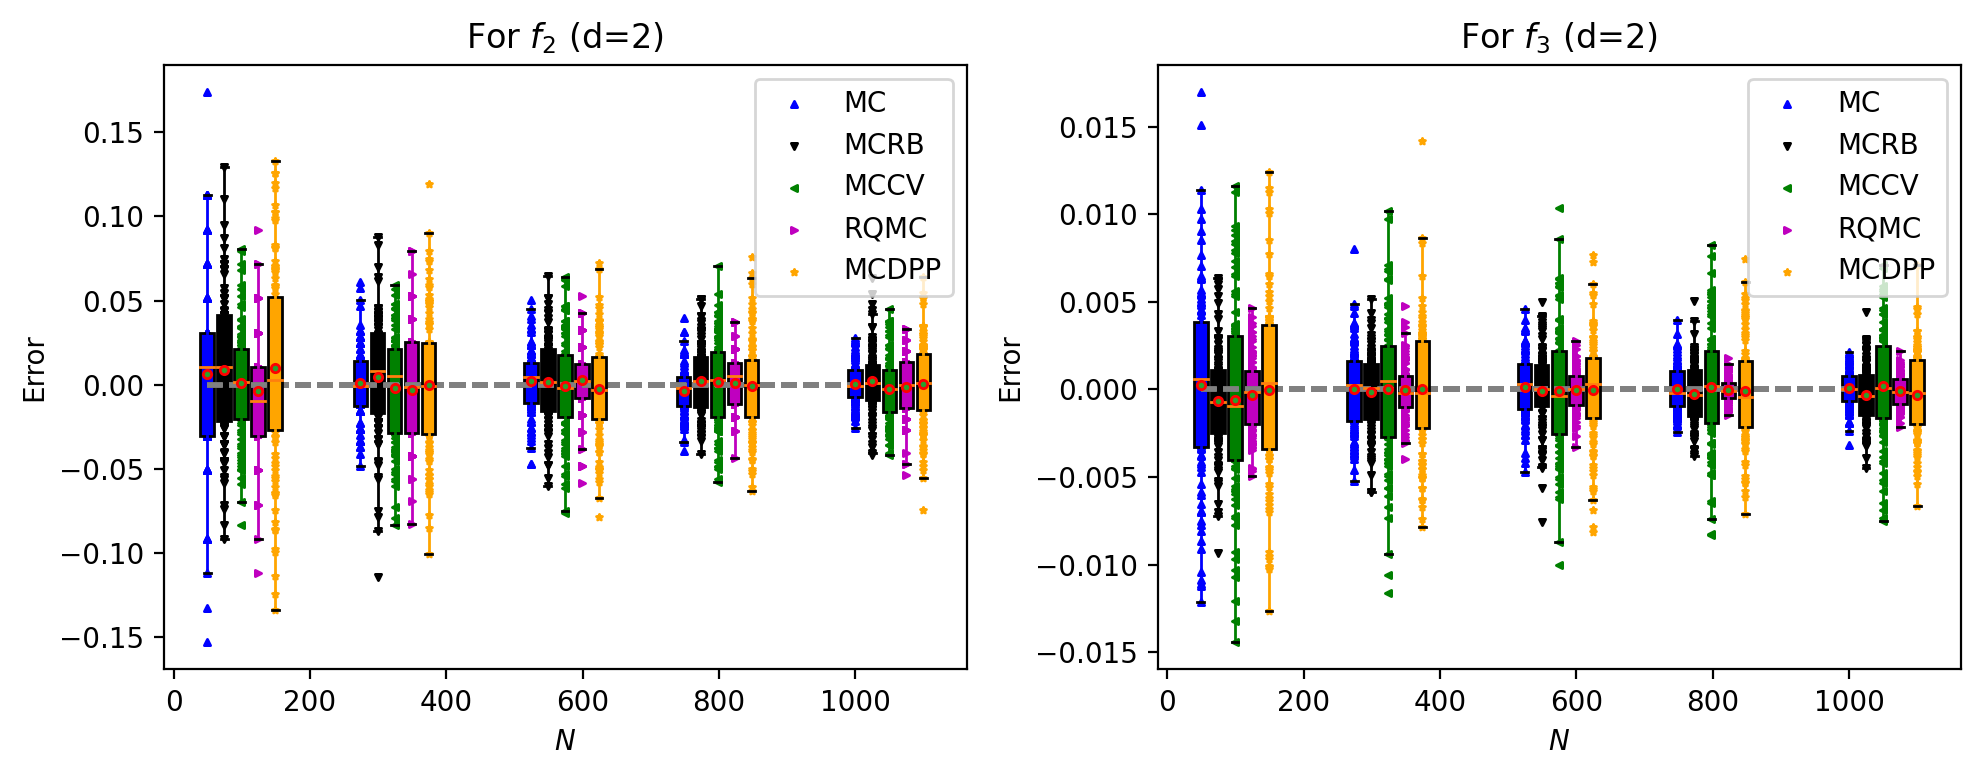

In [25]:
plot_mc_results(d=2, 
                mc_list=results_2d, 
                nb_points_list=nb_points_2d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                #estimators=["MC", "MCRB", "MCDPP"],
                #save_fig="square_error_mc_2d.pdf"
               )

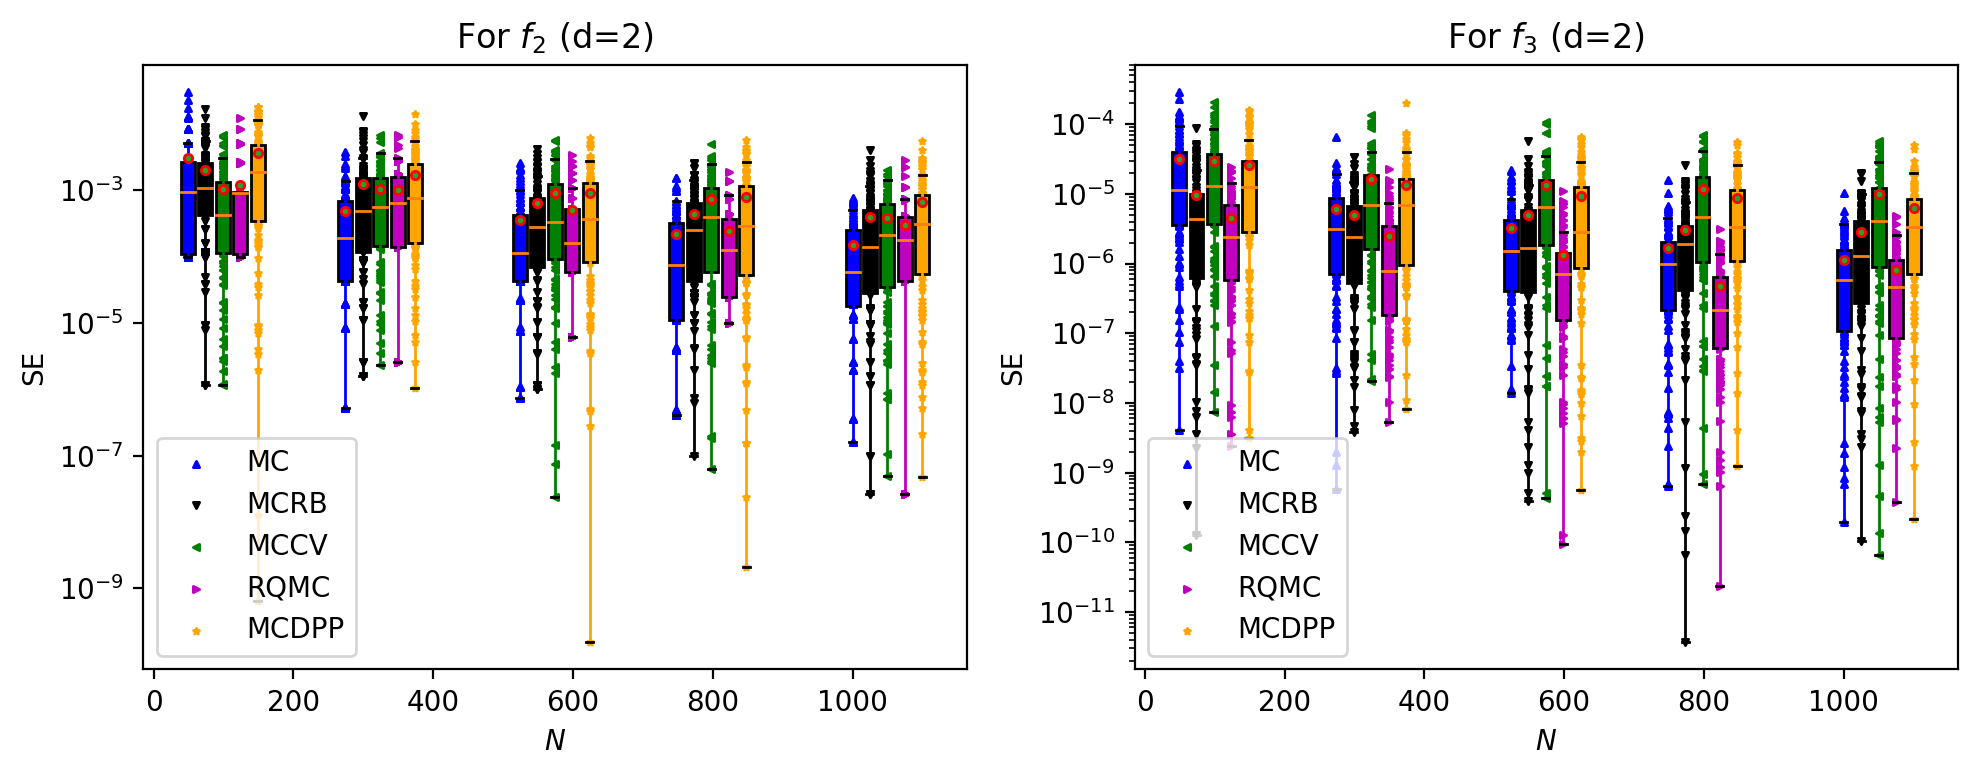

In [26]:
plot_mc_results(d=2, 
                mc_list=results_2d, 
                nb_points_list=nb_points_2d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="SE",
                plot_error=True,
                plot_std=False,
                log_scale=True,
                nb_subsample_nb_points=5,
                estimators=estimators,
                #save_fig="square_error_mc_2d.pdf"
               )

# 2- d=3

In [29]:
d=3
nb_points_list=np.arange(50, 1050, 50).tolist()
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d)]
support_window = support_integrands(d) 

In [30]:
if __name__ == "__main__":
    results_3d, nb_points_3d = mc_results(d, 
                                          nb_points_list=nb_points_list, 
                                          nb_samples=nb_samples,
                                          support_window=support_window,
                                          fct_list=fct_list,
                                          fct_names=fct_names,
                                          exact_integrals=exact_integrals,
                                          estimators=estimators, 
                                          nb_cores=nb_cores,
                                          file_name="mc_results_3d_final.pickle"
                                            )

d= 3 , nb samples= 100 , nb points= [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
------------------------------------------------
For MCRB
---------------
FOR f_1
std= [0.001793726433412729]
MSE= NAN
FOR f_2
std= [0.052743089598976396]
MSE= [0.00278284]
FOR f_3
std= [0.0008238232466877941]
MSE= [6.82589994e-07]
For MC
---------------
FOR f_1
std= [0.003279760632726305]
MSE= NAN
FOR f_2
std= [0.07627849628992145]
MSE= [0.0058192]
FOR f_3
std= [0.0009091865670631382]
MSE= [8.27722475e-07]
For MCCV
---------------
Mean proposal theoretical: [0.00631295] Estiamted: 0.006137377973760026
FOR f_1
std= [0.002077157509734845]
MSE= NAN
Mean proposal theoretical: [0.52449332] Estiamted: 0.5199999999999996
FOR f_2
std= [0.03690649572241526]
MSE= [0.00137704]
Mean proposal theoretical: [-0.00038961] Estiamted: -0.0003808165841441171
FOR f_3
std= [0.001128786580591504]
MSE= [1.27620926e-06]
For MCDPP
---------------
FOR f_1
std= [0.004217826873

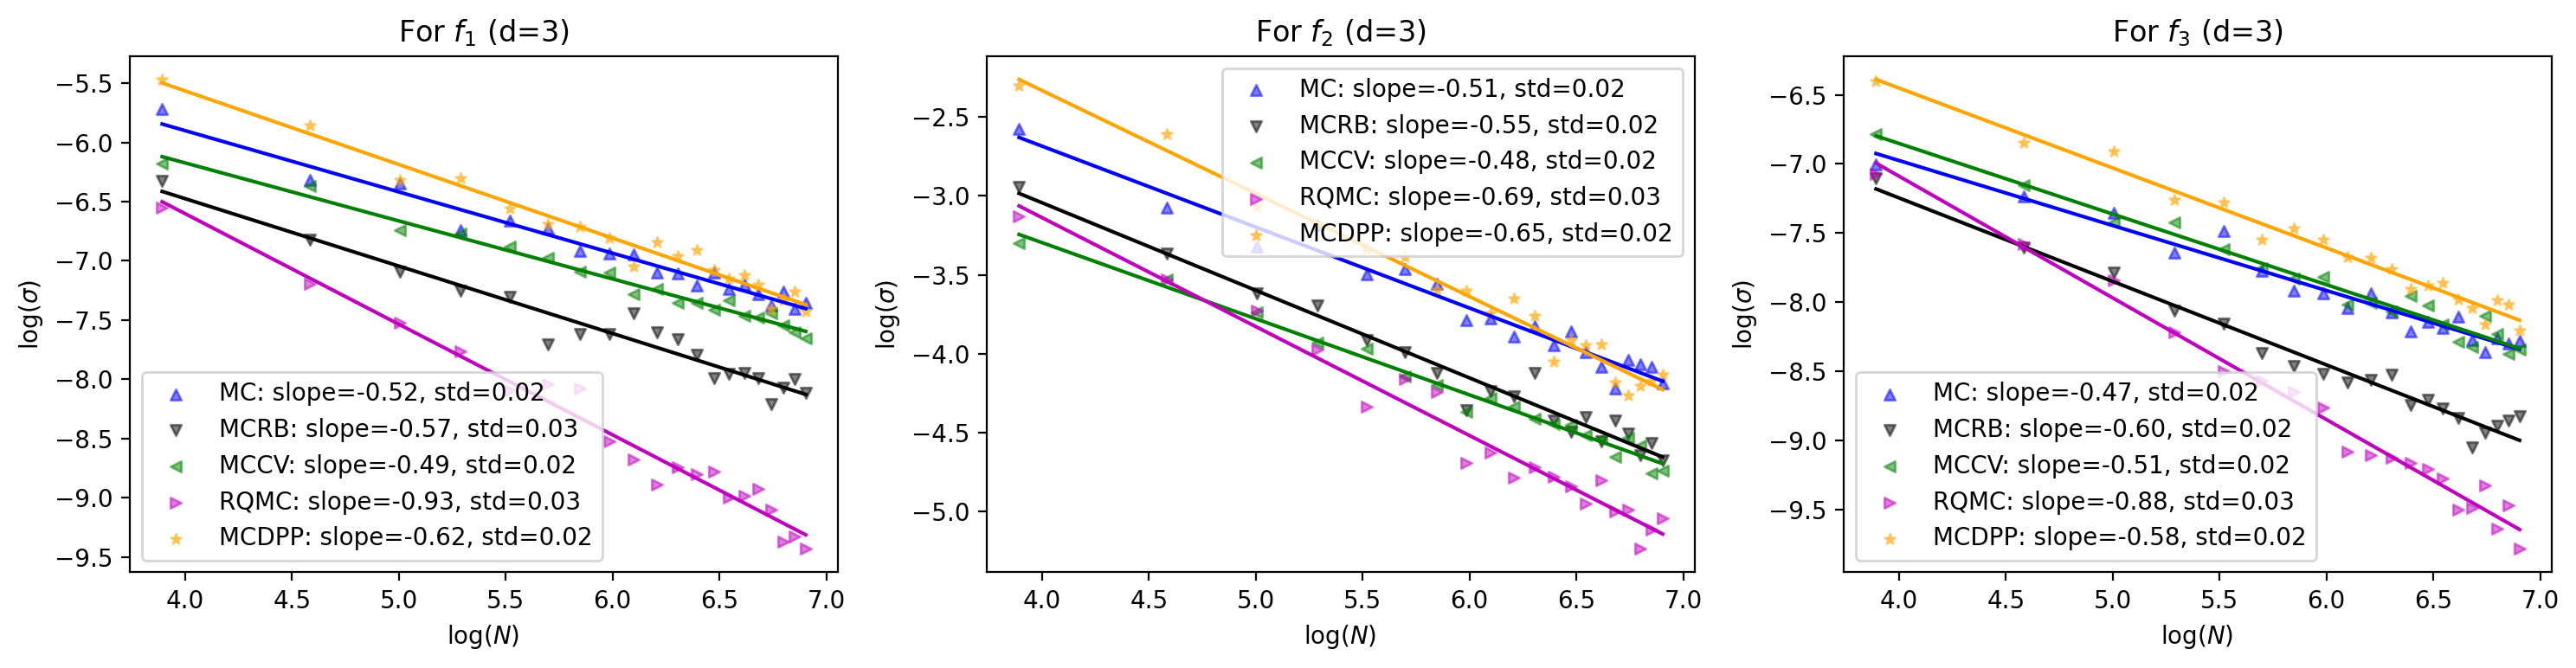

In [31]:
plot_mc_results(d, 
                results_3d, 
                nb_points_3d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_3_d.pdf"
               )

In [ ]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=results_3d, 
                        nb_points_list=nb_points_3d, 
                        fct_names=fct_names, 
                        test_type="SW")

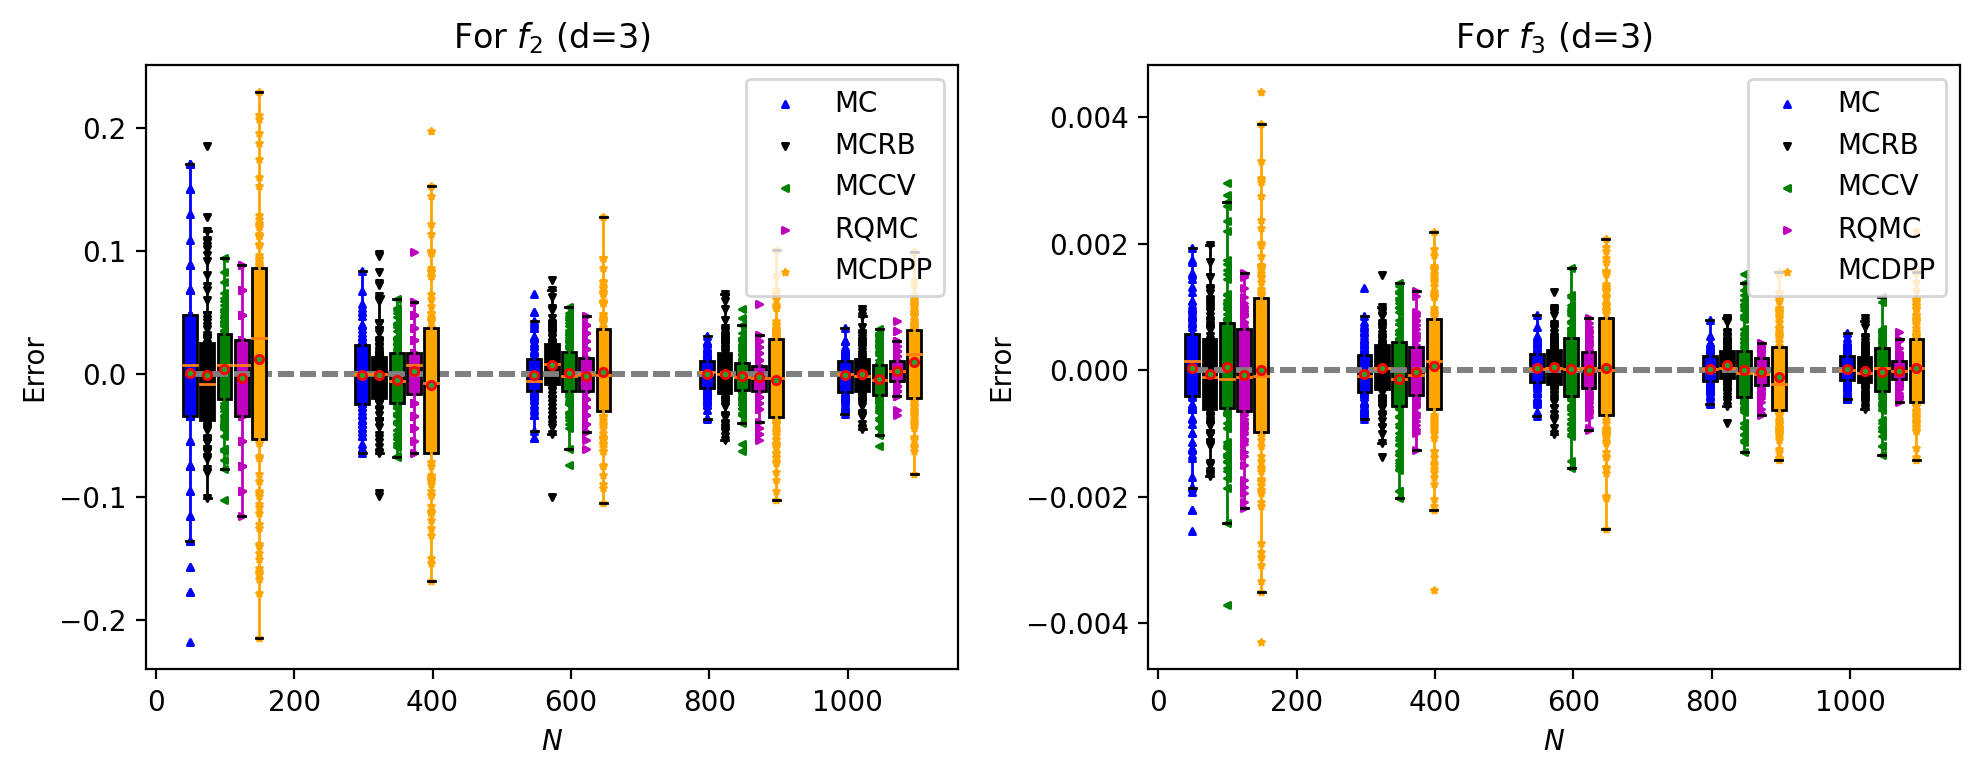

In [32]:
plot_mc_results(d=d, 
                mc_list=results_3d, 
                nb_points_list=nb_points_3d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                #estimators=["MC", "MCRB", "MCDPP"],
                #save_fig="square_error_mc_2d.pdf"
               )

# 3- d=4

In [33]:
d=4
nb_points_list=np.arange(50, 1050, 50).tolist()
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d)]
support_window = support_integrands(d)

In [34]:
if __name__ == "__main__":
    results_4d, nb_points_4d = mc_results(d, 
                                          nb_points_list=nb_points_list, 
                                          nb_samples=nb_samples,
                                          support_window=support_window,
                                          fct_list=fct_list,
                                          fct_names=fct_names,
                                          exact_integrals=exact_integrals,
                                          estimators=estimators, 
                                          nb_cores=nb_cores,
                                          file_name="mc_results_4d_final.pickle"
                                            )

d= 4 , nb samples= 100 , nb points= [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
------------------------------------------------
For MCRB
---------------
FOR f_1
std= [0.0011415161216166338]
MSE= NAN
FOR f_2
std= [0.05772444101953379]
MSE= [0.00338285]
FOR f_3
std= [0.0002040953748720935]
MSE= [4.22676696e-08]
For MC
---------------
FOR f_1
std= [0.0012911414923709532]
MSE= NAN
FOR f_2
std= [0.06733357827925743]
MSE= [0.00464866]
FOR f_3
std= [0.00019134278620805]
MSE= [3.66691072e-08]
For MCCV
---------------
Mean proposal theoretical: [0.00238218] Estiamted: 0.0022615770580952446
FOR f_1
std= [0.0013778855056804475]
MSE= NAN
Mean proposal theoretical: [0.31217373] Estiamted: 0.3039999999999998
FOR f_2
std= [0.04106986188010388]
MSE= [0.00169056]
Mean proposal theoretical: [1.40660052e-05] Estiamted: 2.3503517984389022e-05
FOR f_3
std= [0.00020642699646944134]
MSE= [4.27111658e-08]
For MCDPP
---------------
FOR f_1
std= [0.00286

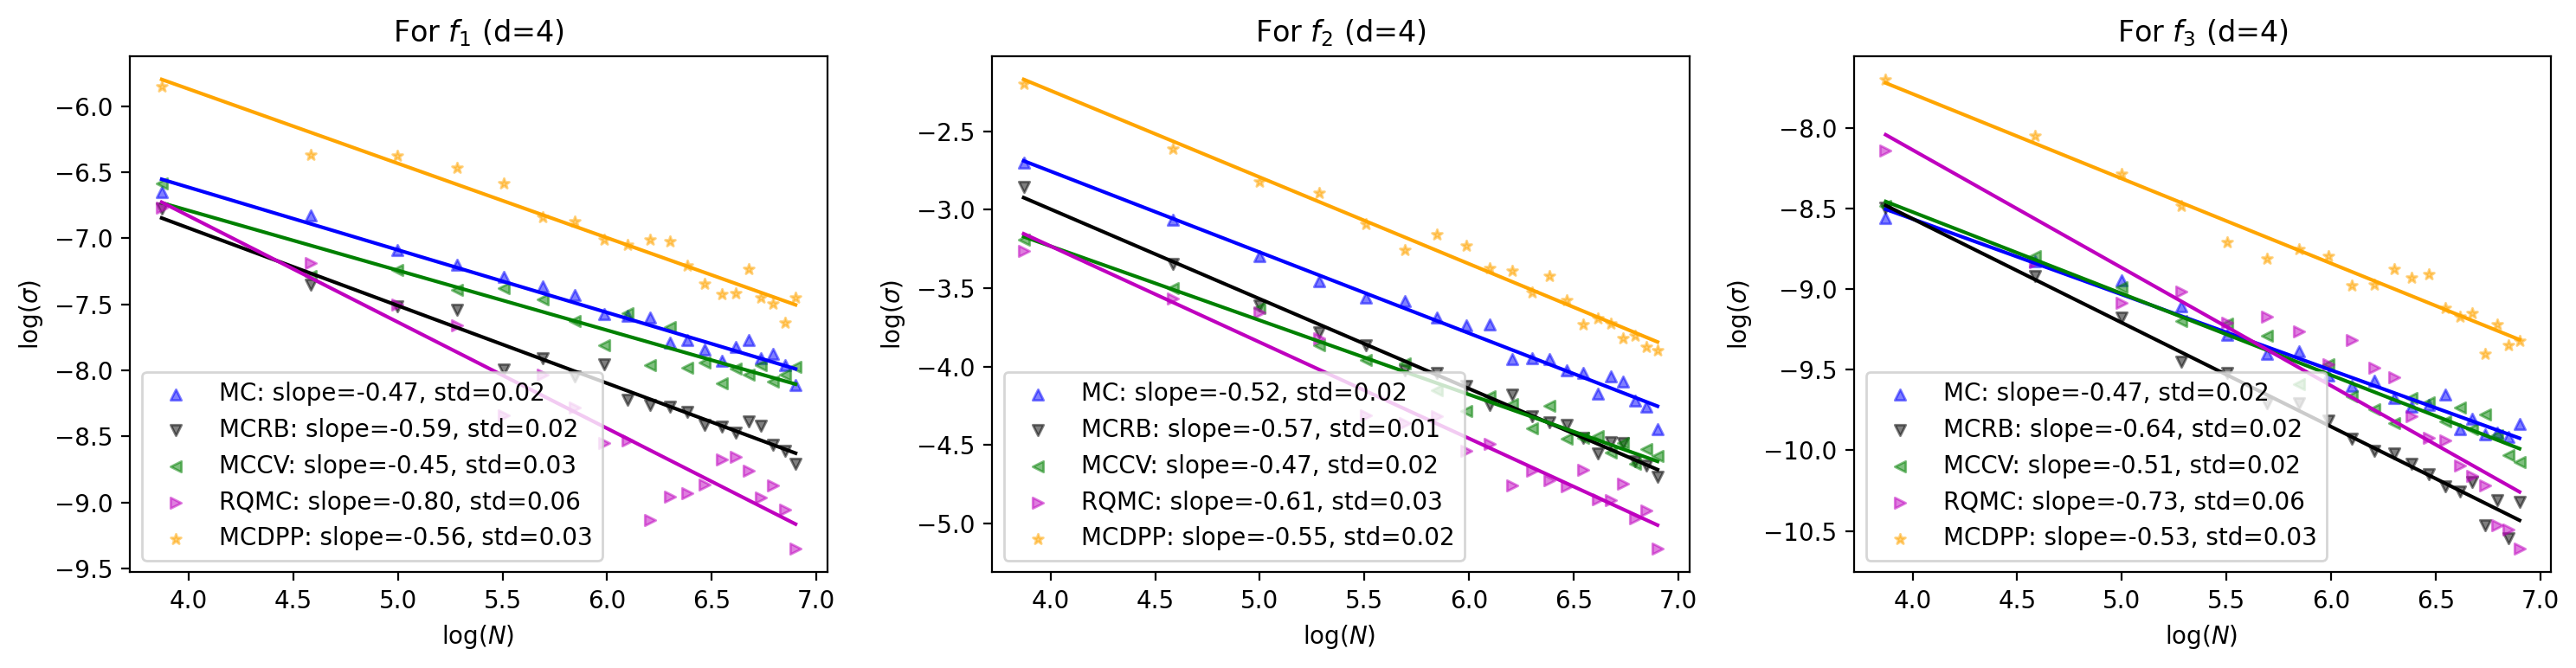

In [35]:
plot_mc_results(d, 
                results_4d, 
                nb_points_4d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_4_d.pdf"
               )

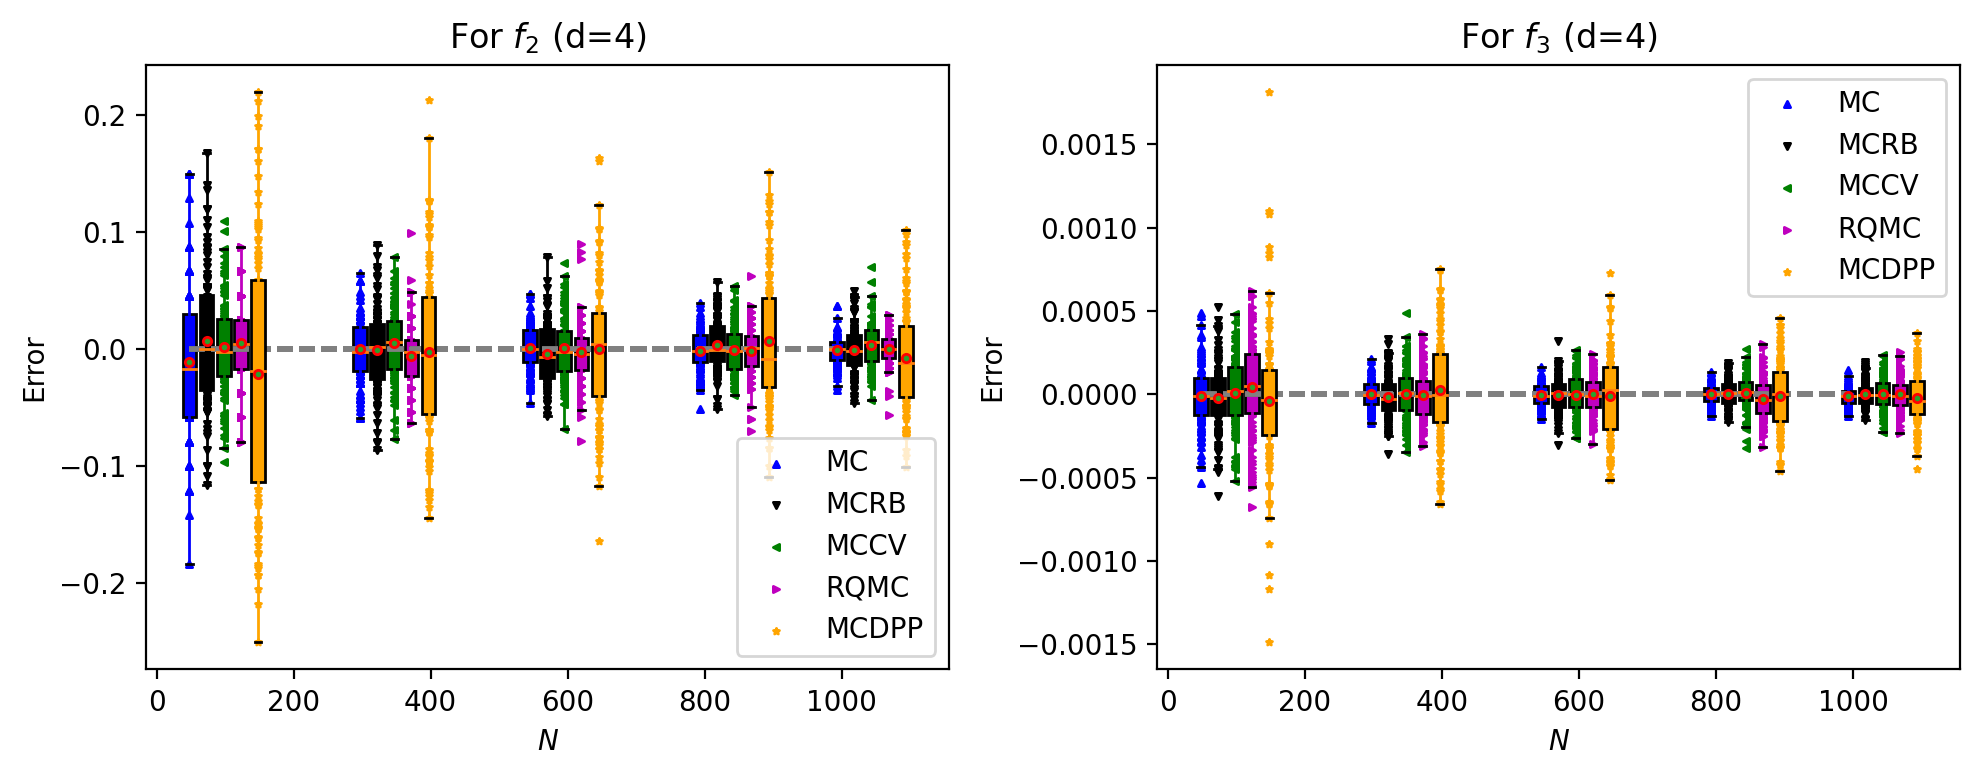

In [36]:
plot_mc_results(d=d, 
                mc_list=results_4d, 
                nb_points_list=nb_points_4d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                #estimators=["MC", "MCRB", "MCDPP"],
                #save_fig="square_error_mc_2d.pdf"
               )